In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from tabulate import tabulate


#%pip install opencv-python # Required to import cv2 !!!
import cv2

from IPython.display import display, Latex, Math

import os
import time

plt.rcParams['figure.dpi'] = 250

# Task 1

In [2]:
A_1 = np.array([
    [1, 0],
    [0, 1]
]) 

A_2 = np.array([
    [1, 2],
    [1, 1], 
    [1, 2]
])

A_3 = np.array([
    [2, 1, 1],
    [2, 1, 1], 
    [1, 1, 2]
])

A_4 = np.array([
    [2, 1, 0],
    [1, 2, 3], 
    [0, 3, 3]
])

In [3]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0, store_norms = False):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """

    if seed != 0:
        np.random.seed(seed)
    
    norms = np.zeros(maxiter)

    #Initialize W and H to random numbers between 0 and 1 with the correct shape
    m = np.shape(V)[0]
    n = np.shape(V)[1]
    W_0 = np.random.uniform(0.0, 1.0, m*d).reshape(m,d)
    H_0 = np.random.uniform(0.0, 1.0, d*n).reshape(d,n)

    #Scale the matrixes
    W_0 = np.sqrt(np.mean(V)/d)*W_0
    H_0 = np.sqrt(np.mean(V)/d)*H_0
    #print("W_0 ",W_0)
    #print("H_0 ",H_0)
    
    W_next = np.copy(W_0)
    W_prev = np.copy(W_0)
    H_next = np.copy(H_0)
    H_prev = np.copy(H_0)
    
    for k in range(maxiter):
        #gir samme resultat
        #H_temp = np.divide(np.multiply(H_prev,np.dot(W_prev.T,V)),np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        #W_temp = np.divide(np.multiply(W_prev,np.dot(V,H_next.T)),np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)

        H_next = (H_prev * np.dot(W_prev.T,V)) / (np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        W_next = (W_prev * np.dot(V,H_next.T)) / (np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)
        H_prev = np.copy(H_next)
        W_prev = np.copy(W_next)
        norms[k] = np.linalg.norm(V- np.dot(W_next, H_next), 'fro')

    if store_norms == False:
        return W_next, H_next
    else:
        return W_next, H_next, norms

## 1d) 

In [4]:
def test_1d():
    W_next_A_1, H_next_A_1 = NMF(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_1_new_seed, H_next_A_1_new_seed = NMF(A_1, 1, delta = 1e-9, maxiter = 1000, seed = 8)

    W_next_A_2, H_next_A_2 = NMF(A_2, 1, delta = 1e-9, maxiter = 1000, seed = 1)   
    W_next_A_2_new_seed, H_next_A_2_new_seed = NMF(A_2, 1, delta = 1e-9, maxiter = 1000, seed = 23)    
 

    print("Matrix A_1:")

    data_A11 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')]]
    print(tabulate(data_A11, headers='firstrow', tablefmt='fancy_grid'))


    #print(f"W: \n {W_next_A_1}")
    #print(f"H: \n {H_next_A_1}")
    #print(f"WH: \n {np.dot(W_next_A_1,H_next_A_1)}")
    #print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')}") 

    
    print()
    print("Matrix A_1 with new seed:")
    data_A1_new_seed = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_1_new_seed,3),np.round(H_next_A_1_new_seed,3),np.round(np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed),3),np.linalg.norm(A_1- np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed), 'fro')]]
    print(tabulate(data_A1_new_seed, headers='firstrow', tablefmt='fancy_grid'))
    #print(f"W: \n {W_next_A_1_new_seed}")
    #print(f"H: \n {H_next_A_1_new_seed}")
    #print(f"WH: \n {np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed)}")
    #print(f"Norm: {np.linalg.norm(A_1- np.dot(W_next_A_1_new_seed,H_next_A_1_new_seed), 'fro')}") 
    #print("\n\n")

    

    print("Matrix A_2:")
    # print(f"W: \n {W_next_A_2}")
    # print(f"H: \n {H_next_A_2}")
    # print(f"WH: \n {np.dot(W_next_A_2,H_next_A_2)}")
    # print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')}")

    data_A21 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_2,3),np.round(H_next_A_2,3),np.round(np.dot(W_next_A_2,H_next_A_2),3),np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')]]
    print(tabulate(data_A21, headers='firstrow', tablefmt='fancy_grid'))

    #print()
    print("Matrix A_2 new seed:")
    # print(f"W: \n {W_next_A_2_new_seed}")
    # print(f"H: \n {H_next_A_2_new_seed}")
    # print(f"WH: \n {np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed)}")
    # print(f"Norm: {np.linalg.norm(A_2- np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed), 'fro')}")
    data_A2_new_seed = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_2_new_seed,3),np.round(H_next_A_2_new_seed,3),np.round(np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed),3),np.linalg.norm(A_2- np.dot(W_next_A_2_new_seed,H_next_A_2_new_seed), 'fro')]]
    print(tabulate(data_A2_new_seed, headers='firstrow', tablefmt='fancy_grid'))

    
test_1d()

Matrix A_1:
╒═══════════╤═════════════════╤═══════════════════════════╤════════╕
│ W         │ H               │ WH                        │   Norm │
╞═══════════╪═════════════════╪═══════════════════════════╪════════╡
│ [[0.186]  │ [[0.471 1.521]] │ [[0.08758625 0.28269224]  │      1 │
│  [0.6  ]] │                 │  [0.28269224 0.91241375]] │        │
╘═══════════╧═════════════════╧═══════════════════════════╧════════╛

Matrix A_1 with new seed:
╒═══════════╤═════════════════╤═════════════════╤════════╕
│ W         │ H               │ WH              │   Norm │
╞═══════════╪═════════════════╪═════════════════╪════════╡
│ [[0.618]  │ [[0.726 0.805]] │ [[0.449 0.497]  │      1 │
│  [0.685]] │                 │  [0.497 0.551]] │        │
╘═══════════╧═════════════════╧═════════════════╧════════╛
Matrix A_2:
╒═══════════╤═════════════════╤═════════════════╤══════════╕
│ W         │ H               │ WH              │     Norm │
╞═══════════╪═════════════════╪═════════════════╪══════════

## 1e

In [5]:
def test_1e():

    W_next_A_1, H_next_A_1 = NMF(A_1, 2, delta = 1e-9, maxiter = 1000, seed = 0)
    W_next_A_2, H_next_A_2 = NMF(A_2, 2, delta = 1e-9, maxiter = 1000, seed = 0)    
    print("Matrix A_1:")
    data_A1 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')]]
    print(tabulate(data_A1, headers='firstrow', tablefmt='fancy_grid'))

    print("Matrix A_2:")
    data_A2 = [np.array(["W","H","WH","Norm"]),[np.round(W_next_A_2,3),np.round(H_next_A_2,3),np.dot(W_next_A_2,H_next_A_2),np.linalg.norm(A_2- np.dot(W_next_A_2,H_next_A_2), 'fro')]]
    print(tabulate(data_A2, headers='firstrow', tablefmt='fancy_grid'))

    #fig = go.Figure(data=[go.Table(header=dict(values=["W","H","WH","Norm"]),
    #             cells=dict(values=[np.round(W_next_A_1,3),np.round(H_next_A_1,3),np.dot(W_next_A_1,H_next_A_1),np.linalg.norm(A_1- np.dot(W_next_A_1,H_next_A_1), 'fro')]))
    #                 ])
    #fig.show()

test_1e()

Matrix A_1:
╒═════════════════╤═════════════════╤═══════════╤════════════╕
│ W               │ H               │ WH        │       Norm │
╞═════════════════╪═════════════════╪═══════════╪════════════╡
│ [[0.903 0.   ]  │ [[1.107 0.   ]  │ [[1. 0.]  │ 9.5643e-10 │
│  [0.    0.314]] │  [0.    3.18 ]] │  [0. 1.]] │            │
╘═════════════════╧═════════════════╧═══════════╧════════════╛
Matrix A_2:
╒═════════════════╤═════════════════╤═══════════╤═════════════╕
│ W               │ H               │ WH        │        Norm │
╞═════════════════╪═════════════════╪═══════════╪═════════════╡
│ [[0.66  0.764]  │ [[0.355 2.436]  │ [[1. 2.]  │ 1.25633e-09 │
│  [0.216 0.922]  │  [1.001 0.513]] │  [1. 1.]  │             │
│  [0.66  0.764]] │                 │  [1. 2.]] │             │
╘═════════════════╧═════════════════╧═══════════╧═════════════╛


## 1f)

In [6]:
def oppg_1f():
    eigenvalues_A3,eigenvectors_A3 = np.linalg.eig(A_3)
    eigenvalues_A4,eigenvectors_A4 = np.linalg.eig(A_4)

    print(r'The eigenvalues of $A_3$ is  {eigenvalues_A3}')
    print(r'The rank of A_3 is {len(eigenvalues_A3)} ')

    print(eigenvalues_A4)
    print(f'The rank of A_4 is {len(eigenvalues_A4)} ')
oppg_1f()


The eigenvalues of $A_3$ is  {eigenvalues_A3}
The rank of A_3 is {len(eigenvalues_A3)} 
[-0.75770177  2.09911499  5.65858678]
The rank of A_4 is 3 


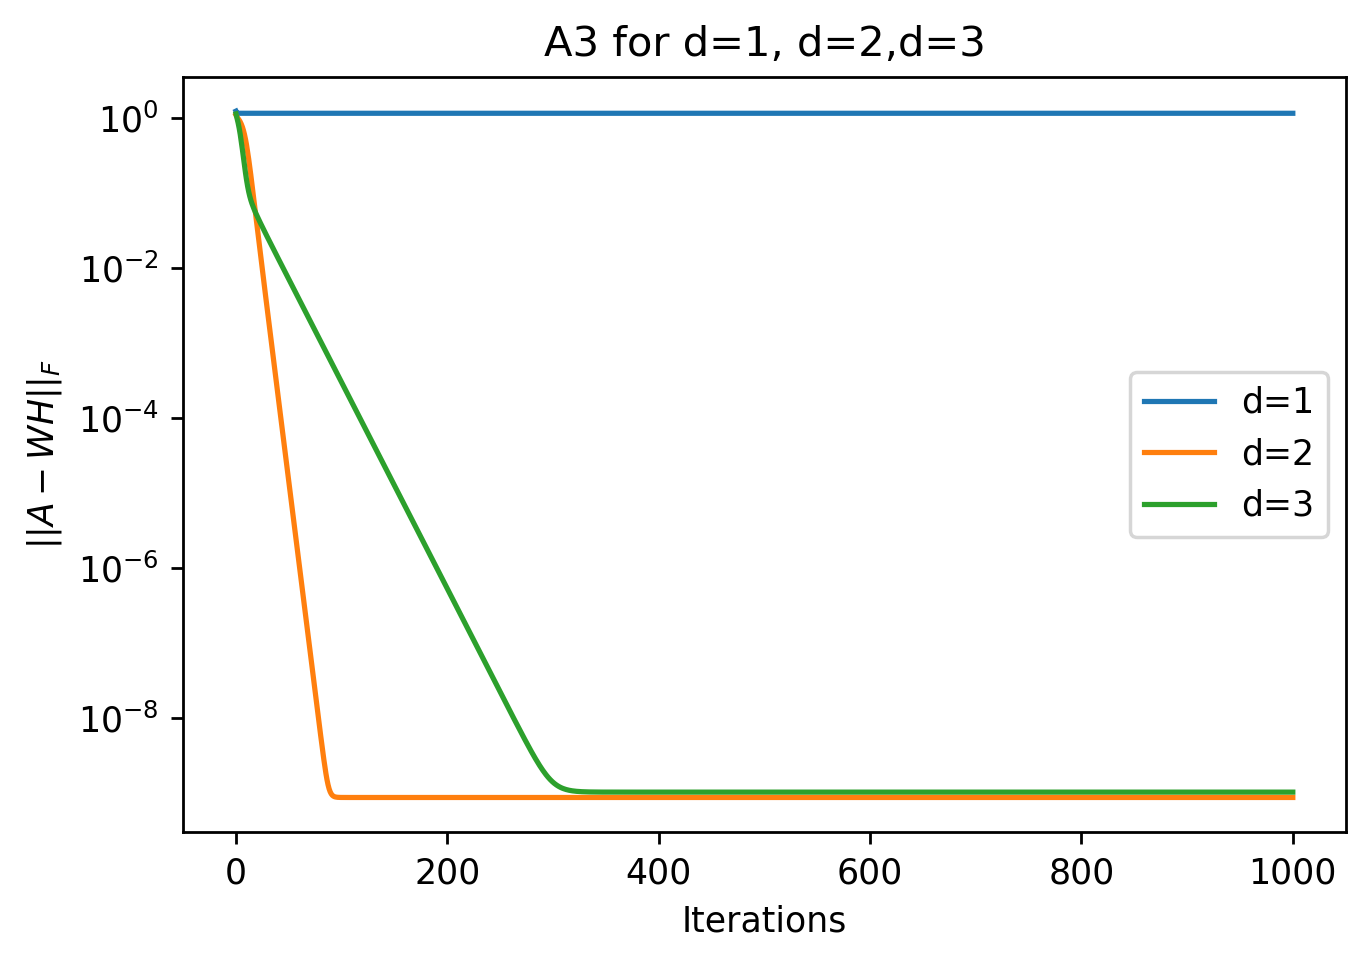

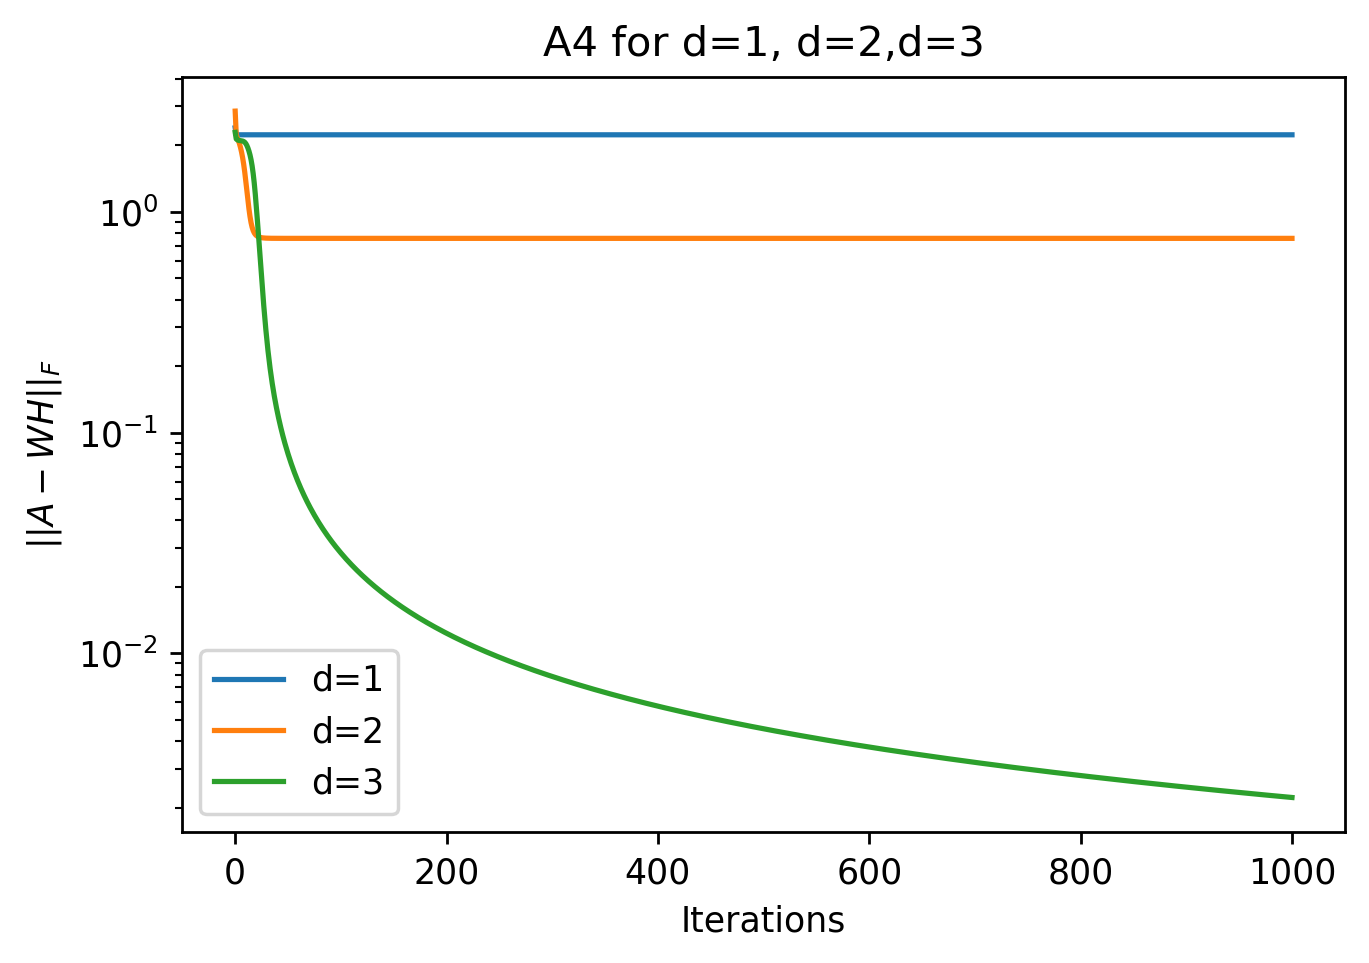

In [7]:
def oppg_1g():
    
    W_next_A3_1, H_next_A3_1, norms_A3_1 = NMF(A_3, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2, H_next_A3_2, norms_A3_2 = NMF(A_3, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3, H_next_A3_3, norms_A3_3 = NMF(A_3, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    iters = np.linspace(0,1000,1000)
    plt.plot(iters,norms_A3_1,label = "d=1")
    plt.plot(iters,norms_A3_2,label= "d=2")
    plt.plot(iters,norms_A3_3,label = "d=3")
    plt.title("A3 for d=1, d=2,d=3")
    plt.yscale('log')
    plt.xlabel("Iterations")
    plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    plt.legend()

    plt.show()

    W_next_A4_1, H_next_A4_1, norms_A4_1 = NMF(A_4, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A4_2, H_next_A4_2, norms_A4_2 = NMF(A_4, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A4_3, H_next_A4_3, norms_A4_3 = NMF(A_4, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    plt.plot(iters,norms_A4_1,label = "d=1")
    plt.plot(iters,norms_A4_2,label= "d=2")
    plt.plot(iters,norms_A4_3,label = "d=3")
    plt.title("A4 for d=1, d=2,d=3")
    plt.yscale('log')
    plt.xlabel("Iterations")
    plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    plt.legend()

    plt.show()






oppg_1g()


# Task 2

In [8]:
# Number of faces to keep in final array
N = 500

In [9]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

In [10]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

## 2a

In [11]:
def plot_random_faces():
    # Load all 10000 images
    faces = load_images(10000)

    # Select N random images
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces = faces[:,:,:,choices]

    # Check that the shape is correct
    print(faces.shape)

    # Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
    plotimgs(faces, 8, filename="punks.png")
# plot_random_faces()

## 2b
Jeg har funnet ut at det er raskere å hente bildedata fra en npz fil vs loadimages, så jeg gjør det


In [12]:
def generate_face_data():
    '''
    This funtion loads all images to numpy arrays and saves them to a selection of smaller arrays. This
    is to reduce runtime while testing the upcomming calculations.
    '''
    # Load all 10000 images
    faces = load_images(10000)

    # Select 500 random images
    N = 500
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_500 = faces[:,:,:,choices]
    assert (faces_500.shape == (24, 24, 4, 500))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 100
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_100 = faces[:,:,:,choices]
    assert (faces_100.shape == (24, 24, 4, 100))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 4
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_4 = faces[:,:,:,choices]
    assert (faces_4.shape == (24, 24, 4, 4))  # Make sure the dimensions are correct

    
    np.savez(
        'faces',
        faces = faces,
        faces_500 = faces_500,  # 500 faces
        faces_100 = faces_100,  # 100 faces
        faces_4 = faces_4       # 4 faces
    )
generate_face_data()

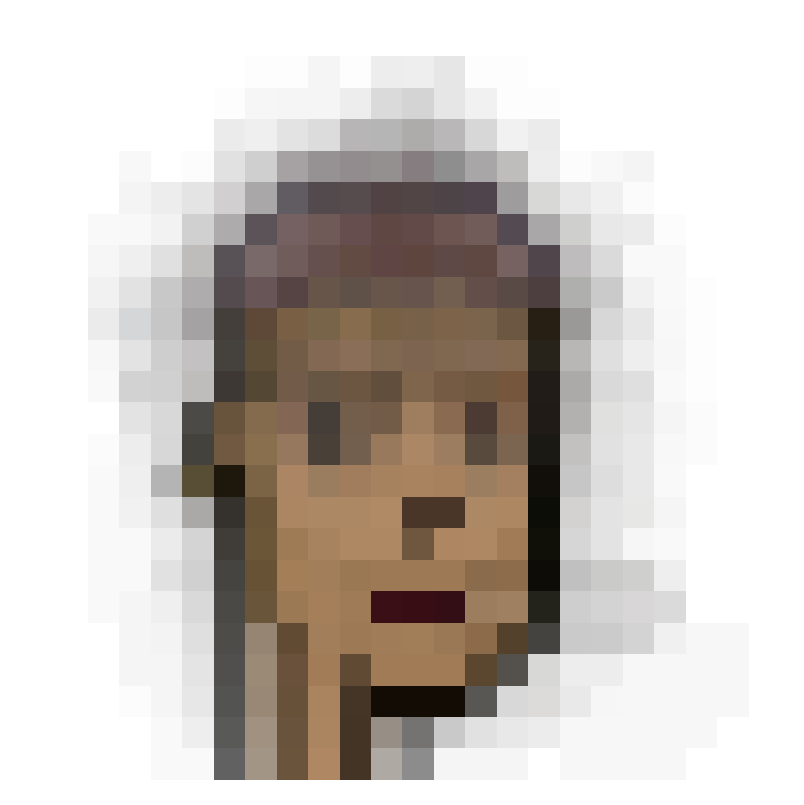

In [13]:
def find_mean_faces(face_data):
    '''
    Contrary to the name, this function does not actualy find 'mean' faces, but rather the mean value of each pixel
    in the faces dataset.
    Input:
        face_data: string, the face array for which we will calculate the mean
    The output is saved to a file as a 24*24*4 array:
        Filename:   mean_faces.npz
        Arraydata:  face_mean
    '''
    # Start by loading the faces that are to be used
    faces_data = np.load('faces.npz')
    faces = faces_data[face_data]

    ########################################################
    # Create some test-data to verify that the 
    # method works
    # faces[:, :, :, 0] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 1] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 2] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 3] = [[[1/4, 0, 0, 1 ]]]   # nothing

    # Alter face 3
    # faces[6:18, 6:18, :, 3] = [[[0, 1, 0, 1]]]  # green
    # The mean should be yellow

    ########################################################


    # The images are stored on the last index of the faces array
    mean_faces = np.mean(faces, axis = 3)
    assert(mean_faces.shape == (24, 24, 4)) # assert the correct shape

    np.savez(
        'mean_faces.npz',
        mean_faces = mean_faces
    )
    
    # Plotting

    plt.imshow(mean_faces[:, :, :])
    plt.axis('off')
    plt.show()


    
find_mean_faces('faces')

IndexError: index 2 is out of bounds for axis 3 with size 2

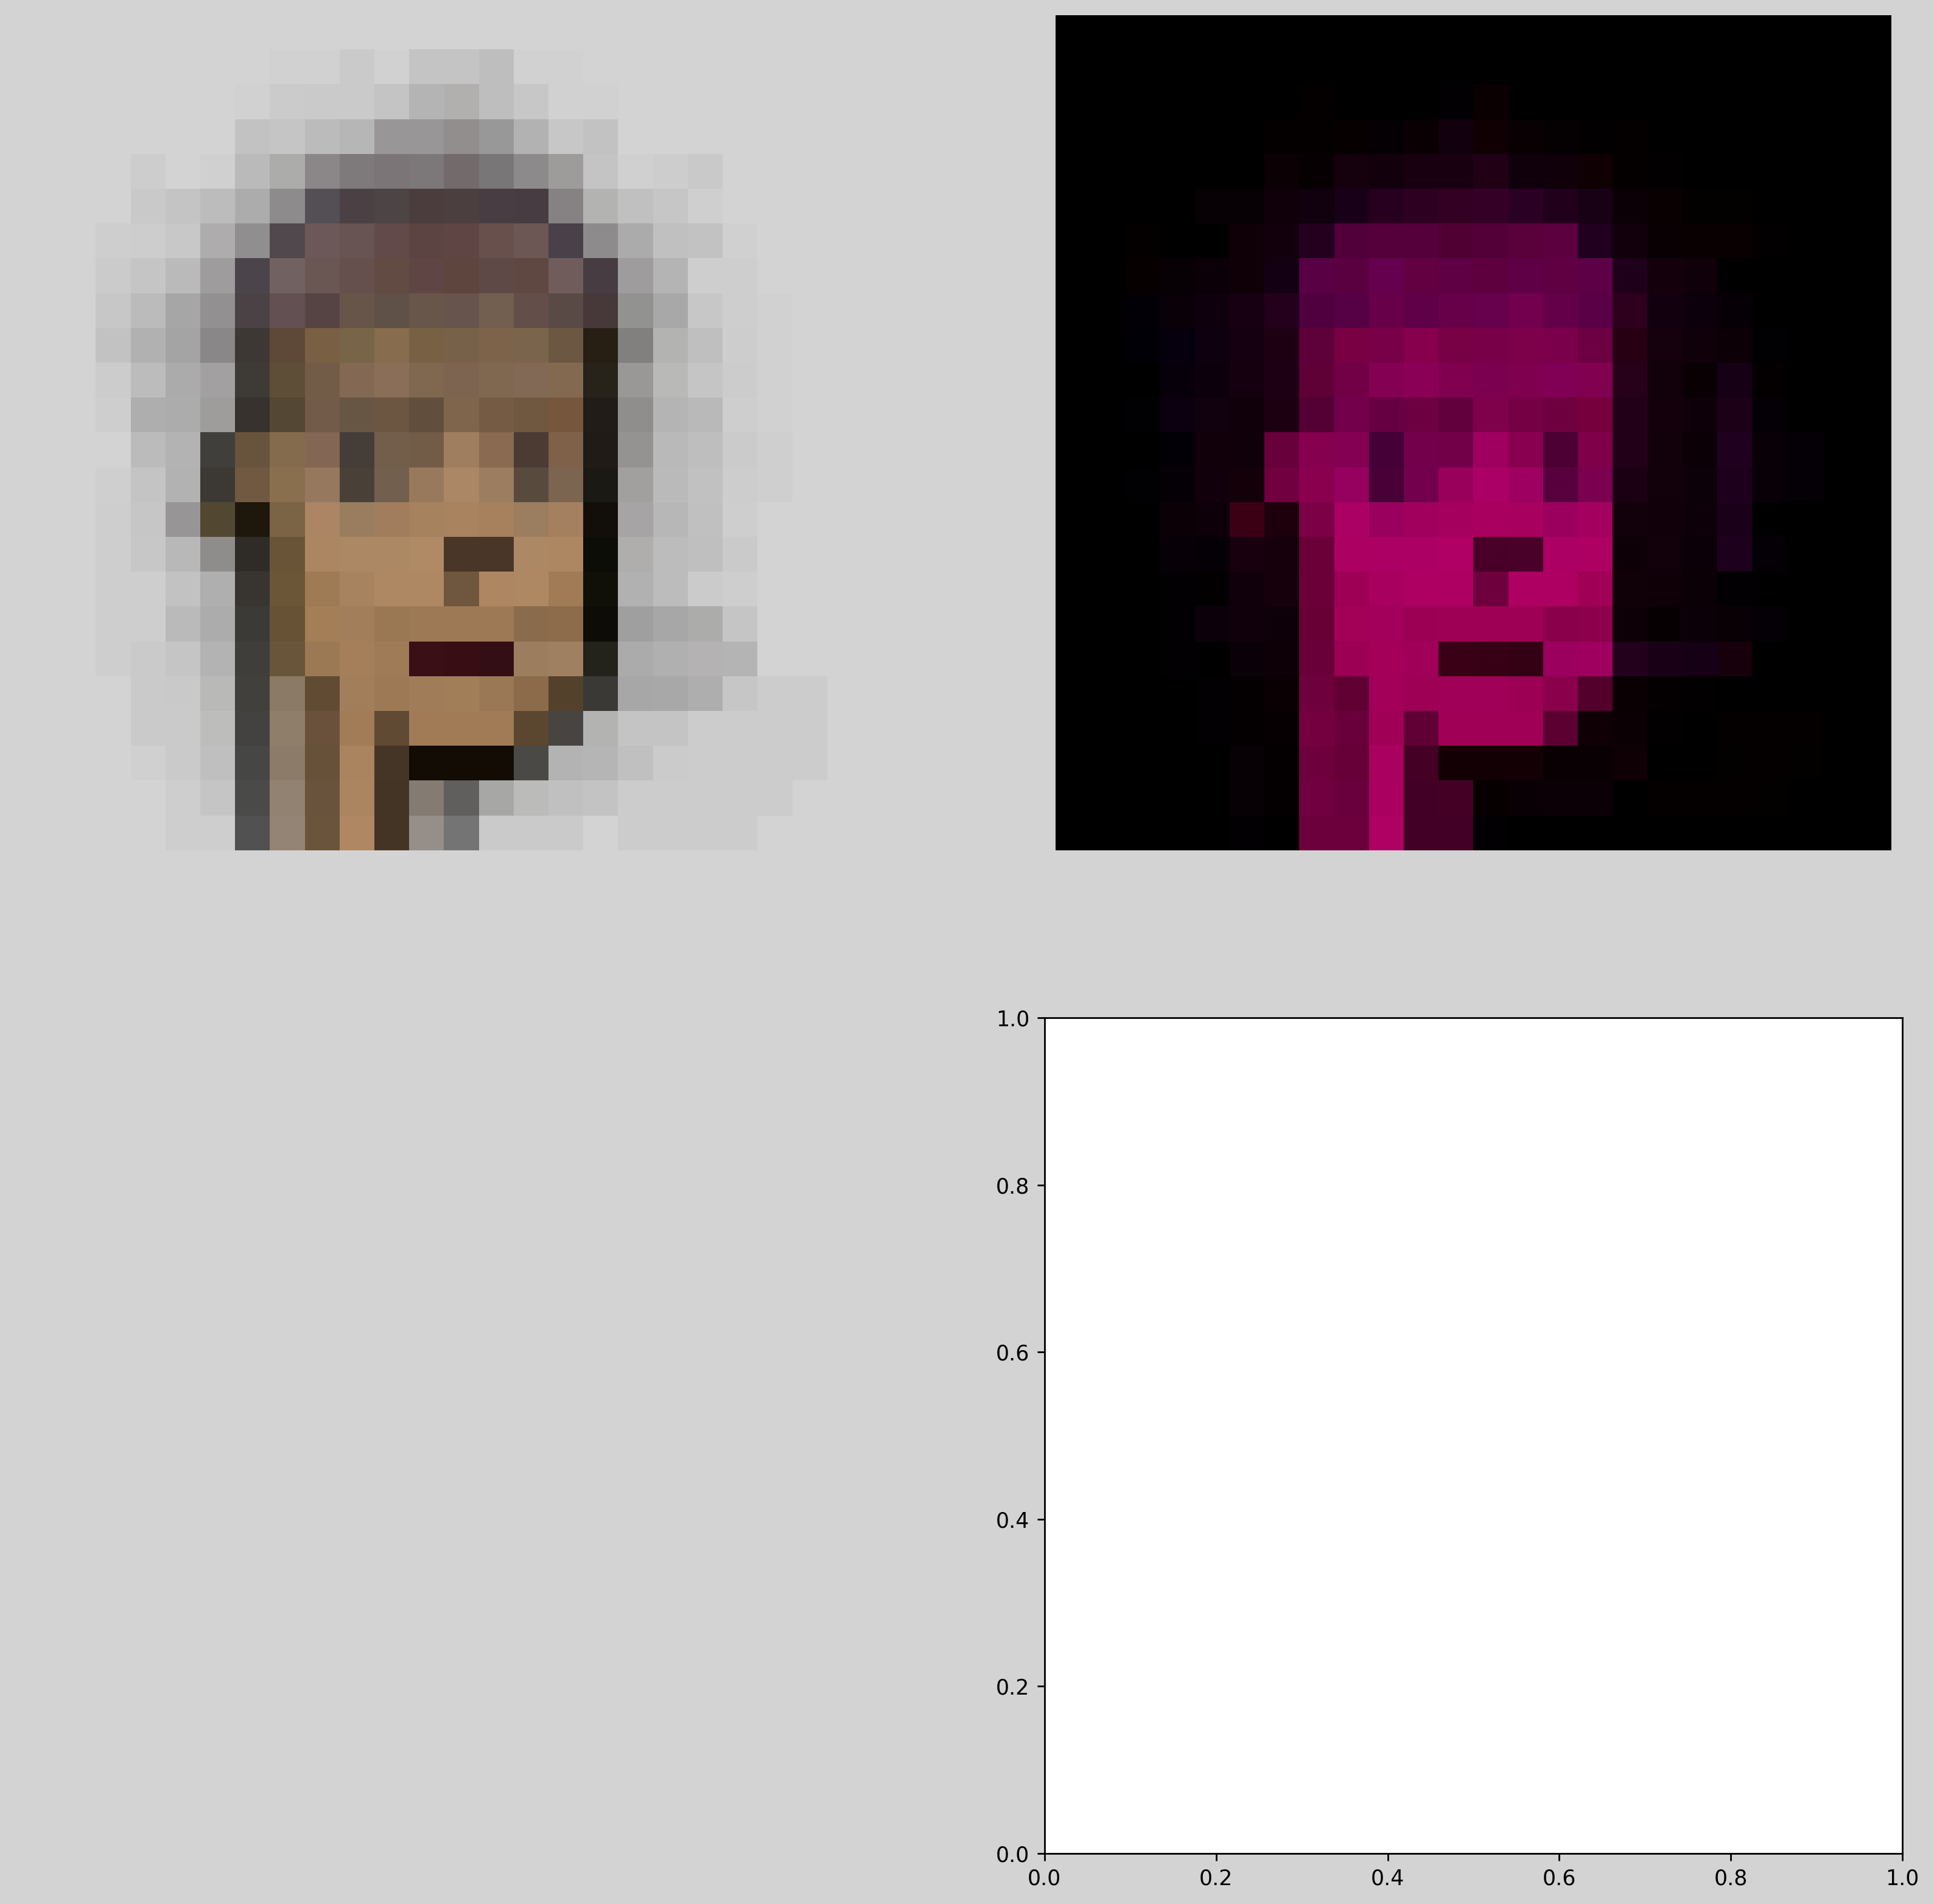

In [31]:
def mean_chanels():
    # Load the relevant data
    face_data = np.load('mean_faces.npz')
    mean_faces = face_data['mean_faces']
    assert(mean_faces.shape == (24, 24, 4))

    # Array containing all the faces that are to be plotted
    faces = np.reshape(mean_faces, (24, 24, 4, 1))

    # Isolate the chanels
    red_face = np.copy(mean_faces)
    red_face[:,:,1:2] = 0
    red_face[:,:,3] = 1
    red_face = np.reshape(red_face, (24, 24, 4, 1))
    faces = np.append(faces, red_face, axis=3)


    plotimgs(faces, 2)

    
    
mean_chanels()

## 2c

In [ ]:
def calculate_NMF(d_val):  
    '''
    Calculating the NMF of the 3 color channels, and plotting the the columns of W interpreted as RGB images.

    Input:
        d_val: int, number of columns in the W-matrix
        
    Output:
        W: array
        H: array
    '''
    
    # Loading the image-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500'][:, :, 0:3, :]
    assert (faces.shape == (24, 24, 3, 500))
    
    # Reshape the remaining three color channels into a 1728xN
    faces_reshaped = np.reshape(faces, (1728, 500))
    assert (faces_reshaped.shape == (1728, 500))

    # Calculate the NMF of the A-matrix
    W, H = NMF(faces_reshaped, d_val)

    # Reshaping the W-matrix into a 24×24×3x64-matrix
    W = np.reshape(W, (24, 24, 3, d_val))
    assert (W.shape == (24, 24, 3, d_val))

    # Plot the columns of W 
    plotimgs(W, nplot = 8, rescale = False, filename = None)



    # Returning the W- and H-matrixes
    return W, H

# W_calculated, H_calculated = calculate_NMF(64)




In [ ]:
def calculate_NMF():  
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500'][:, :, 0:3, :]
    assert (faces.shape == (24, 24, 3, 500))
    
    A = np.reshape(faces, (1728, 500))
    assert (A.shape == (1728, 500))

    d_val = 64
    W, H = NMF(A, d_val)
    W = np.reshape(W, (24, 24, 3, d_val))
    assert (W.shape == (24, 24, 3, d_val))

    plotimgs(W, nplot = 8, rescale = False, filename = None)

    return W, H
    
# W_calculated, H_calculated = calculate_NMF()

## 2d

In [ ]:
def calculate_reconstructions(W, H):
    '''
    Calculating the reconstructions WH, and plotting these

    Input:
        d_val: int, number of columns in the W-matrix
        
    Output:
        W: array, previously calculated W-matrix
        H: array, previously calculated W-matrix
    '''
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']
    plotimgs(faces, nplot = 8, rescale = False, filename = None)

    # Plotting the matrix A = WH using the plotimgs-funtion.
    plotimgs(np.dot(W, H), nplot = 8, rescale = False, filename = None)
    
calculate_reconstructions(W_calculated, H_calculated)

## 2e

In [ ]:
def oppgave_to_e():
    d_vals = [16, 32, 64]
    norms = []
    
    # Loading the image-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500'][:, :, 0:3, :]
    assert (faces.shape == (24, 24, 3, 500))
    
    # Reshape the remaining three color channels into a 1728xN
    faces_reshaped = np.reshape(faces, (1728, 500))
    assert (faces_reshaped.shape == (1728, 500))

    for i in range(len(d_vals)):

        W, H, n = NMF(faces_reshaped, d_vals[i], delta = 1e-9, maxiter = 1000, seed = 0, store_norms = True)
        #np.append(norms, norm)
        norms.append(n)

    return norms
        
#norms_calculated = oppgave_to_e()

In [ ]:
def oppgave_to_e_2(norms):
    x_arr = np.arange(0, len(norms[0]), 1)
    plt.plot(x_arr,norms[0], label = 'd = 16')
    plt.plot(x_arr,norms[1], label = 'd = 32')
    plt.plot(x_arr,norms[2], label = 'd = 64')
    plt.title("Norms as function of iterations")
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\vert\vert{A-W_{k} H_{k}}\vert\vert_{F}$')
    plt.legend()
    plt.yscale('log')
    plt.show()
#oppgave_to_e_2(norms_calculated)

In [ ]:
def calculate_reconstructions(W, H):
    #WH = np.dot(W, H)
    plotimgs(np.dot(W, H), nplot = 8, rescale = False, filename = None)
    
calculate_reconstructions(W_calculated, H_calculated)